In [1]:
#                                         Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# For seaborn visualization
%matplotlib inline

In [4]:
# Assume athelet_events = df
df=pd.read_csv(r'C:\Users\Youssef\Desktop\athlete_events.csv')

In [5]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [6]:
#Converting Medal Column to a appropriate value
df['Medal'].fillna('No Medal',inplace=True)

<Figure size 7200x3600 with 0 Axes>

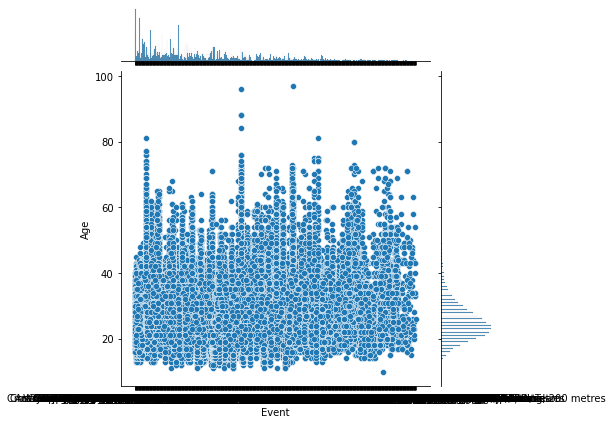

In [7]:
# Correlation between Age and Event Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Event',y='Age',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

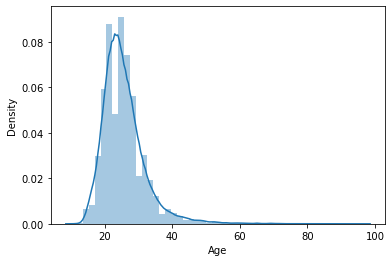

In [8]:
# Showing skeweness of distribution
sns.distplot(df['Age'])


In [9]:
# Filling missing values in Age column using "Multivariate Imputation(Age)"
gb=round(df.groupby(['Event']).mean()['Age'])
for i in range(len(df['Age'])):
    if df['Age'].isnull().iloc[i]:
        event_loc=df['Event'].iloc[i]
        check_Null=gb[event_loc]
        if check_Null!=check_Null:
#             Since distribution is skewed
            df['Age'].iloc[i]=round(df['Age'].median()) 
        else:
            df['Age'].iloc[i]=gb[event_loc]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<Figure size 7200x3600 with 0 Axes>

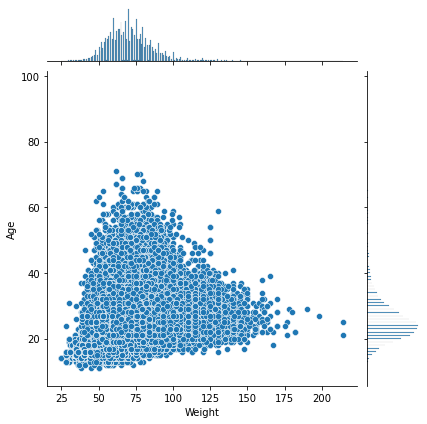

In [10]:
# Correlation between Age and Weight Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Weight',y='Age',data=df)

<Figure size 7200x3600 with 0 Axes>

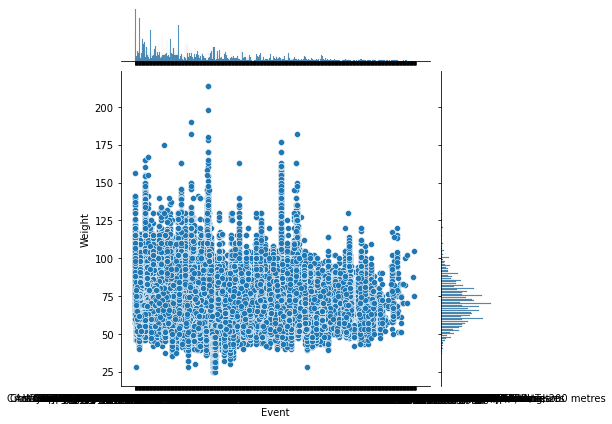

In [11]:
# Correlation between Weight and Event Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Event',y='Weight',data=df)

In [12]:
# Filling missing values in Weight column using "Multivariate Imputation(Event,Age)"
gb=df.groupby(['Event','Age']).mean()['Weight']
for i in range(len(df['Weight'])):
    if df['Weight'].isnull().iloc[i]:
        event_loc=df['Event'].iloc[i]
        age_loc=df['Age'].iloc[i]
        check_Null=gb[event_loc][age_loc]
        if check_Null!=check_Null:
            df['Weight'].iloc[i]=df['Weight'].mean()
        else:    
            df['Weight'].iloc[i]=gb[event_loc][age_loc]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<Figure size 7200x3600 with 0 Axes>

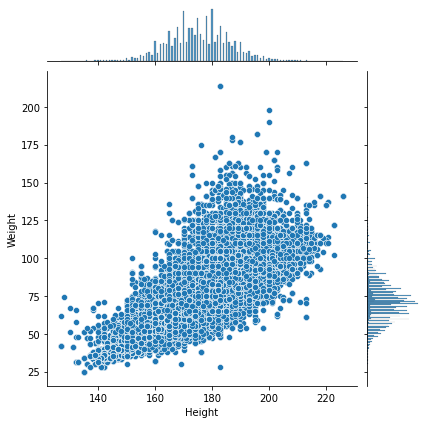

In [13]:
# Correlation between Weight and Height Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Height',y='Weight',data=df)

<Figure size 7200x3600 with 0 Axes>

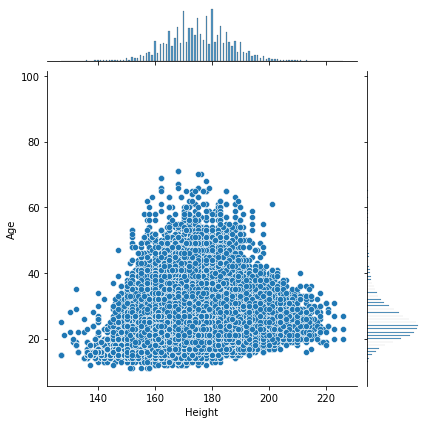

In [14]:
# Correlation between Age and Height Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Height',y='Age',data=df)

In [15]:
# Filling missing values in Height column using "Multivariate Imputation(Weight,Age)"
gb=df.groupby(['Weight','Age']).mean()['Height']
for i in range(len(df['Height'])):
    if df['Height'].isnull().iloc[i]:
        weight_Loc=df['Weight'].iloc[i]
        age_Loc=df['Age'].iloc[i]
        check_Null=gb[weight_Loc][age_Loc]
        if check_Null!=check_Null:
            df['Height'].iloc[i]=df['Height'].mean()
        else:    
            df['Height'].iloc[i]=gb[weight_Loc][age_Loc]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:>

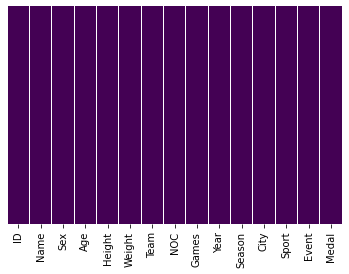

In [16]:
#Heatmap showing off the missing values in each column
# plt.figure(figsize=(10,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Age with countries


<AxesSubplot:xlabel='NOC', ylabel='Age'>

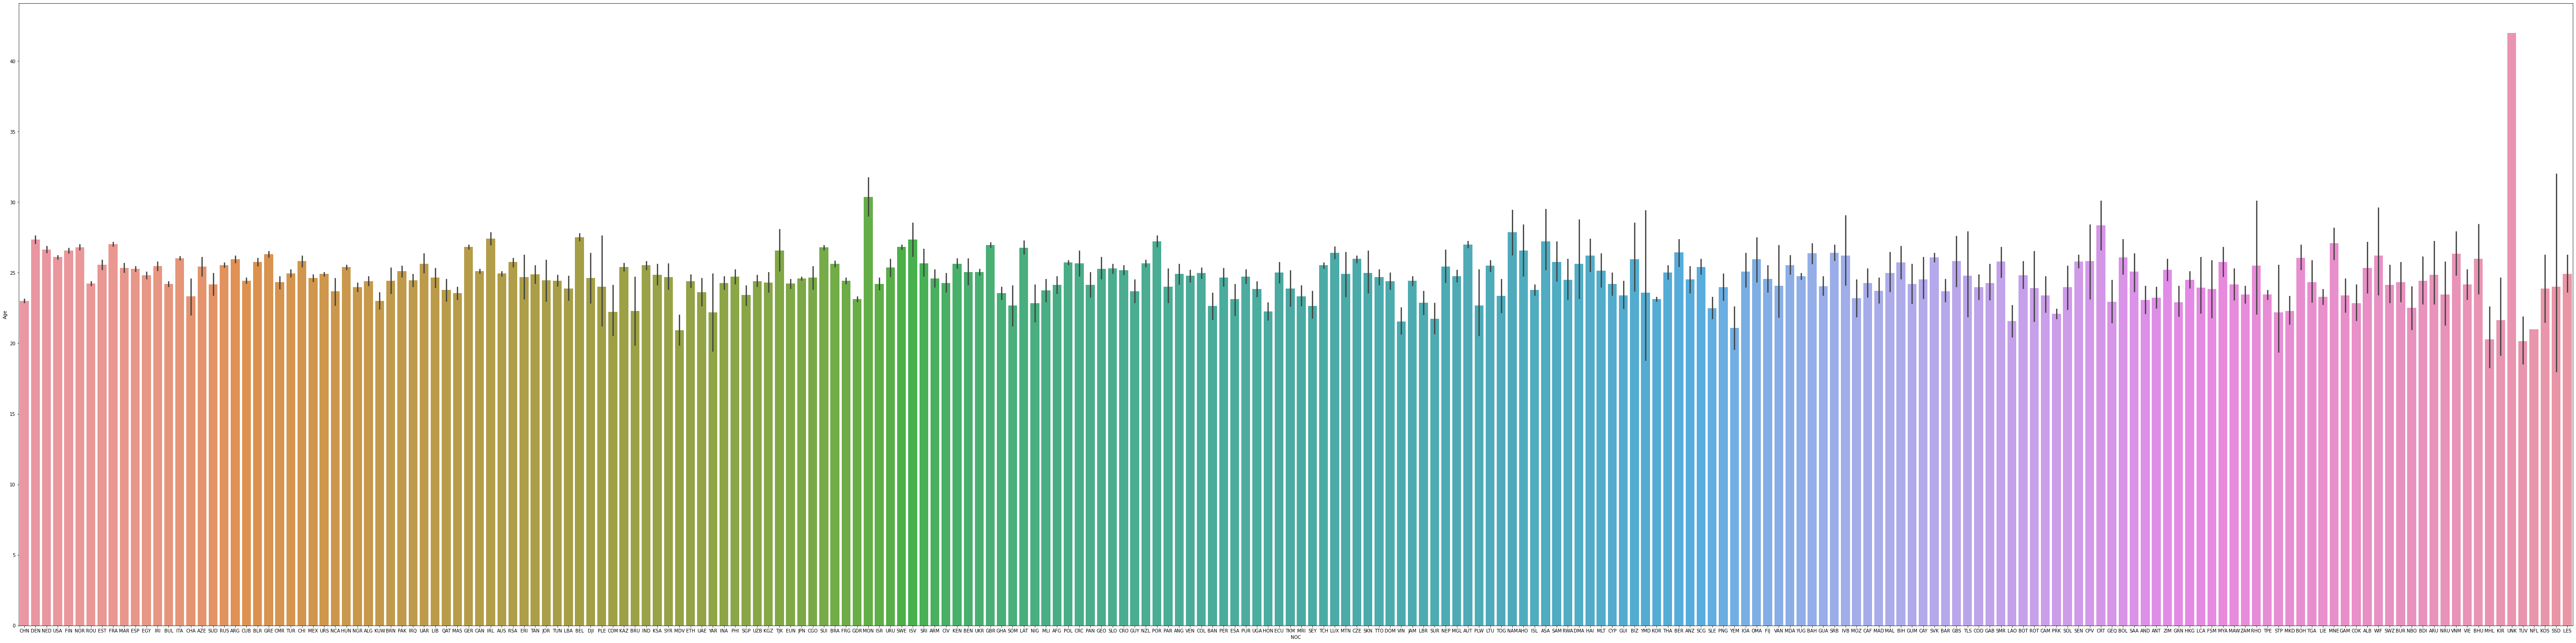

In [17]:
plt.figure(figsize=(100,25))
sns.barplot(x='NOC',y='Age',data=df)

# Age with sports

<AxesSubplot:xlabel='Sport', ylabel='Age'>

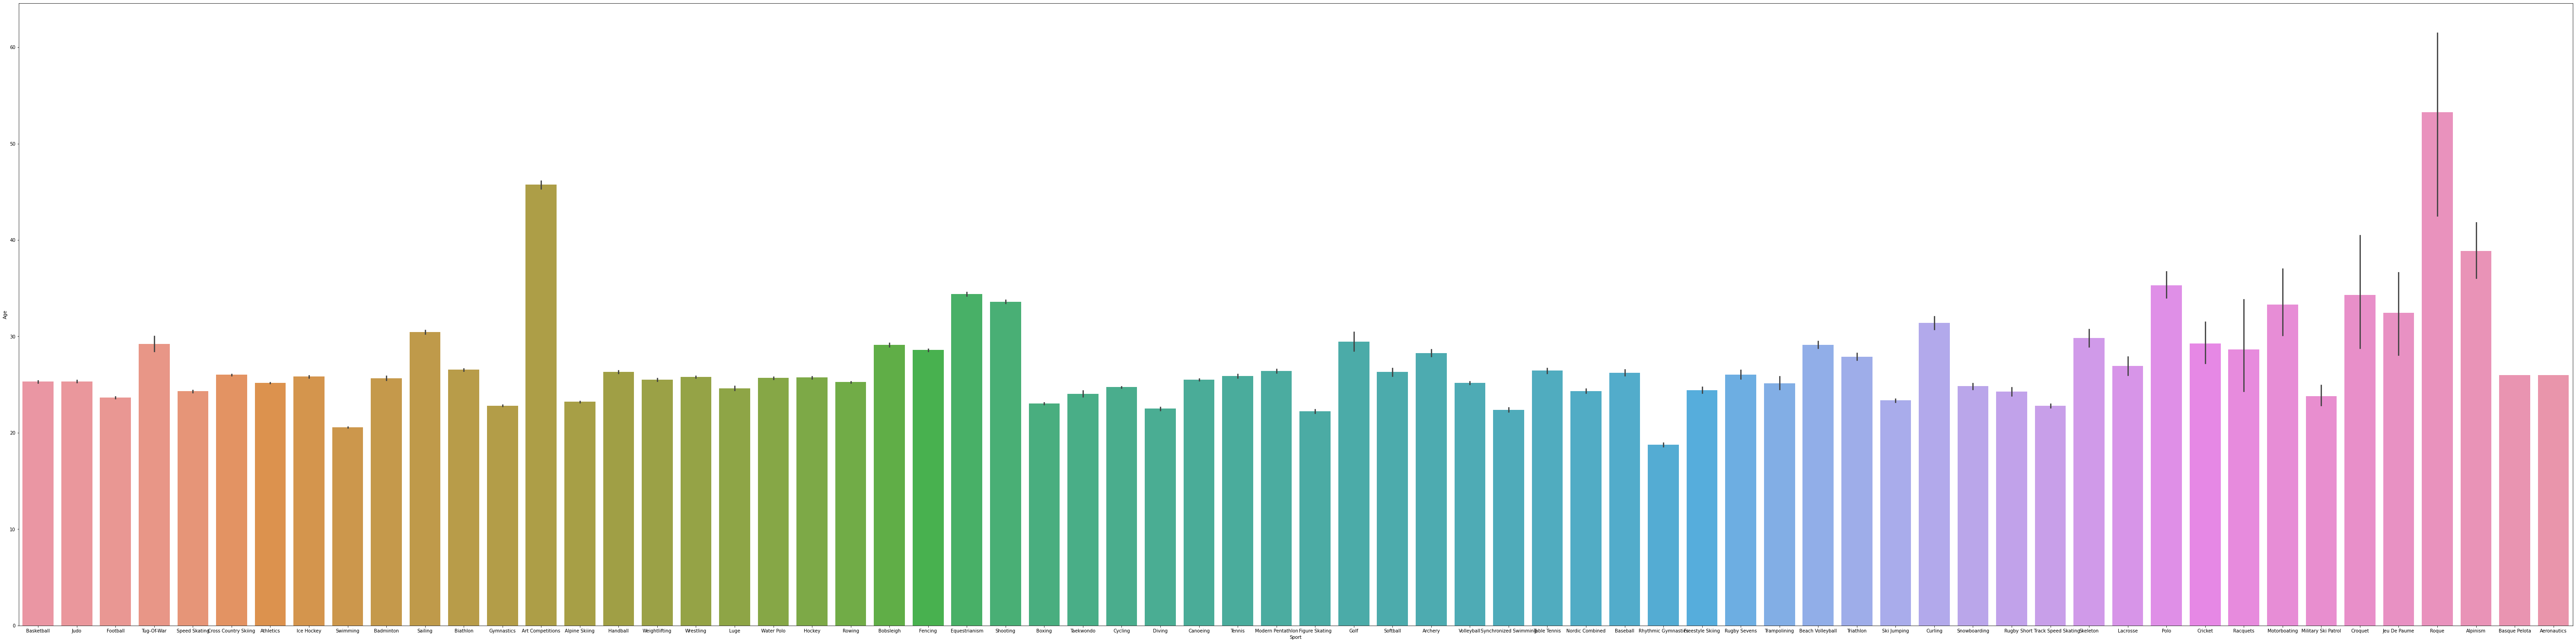

In [19]:
plt.figure(figsize=(100,25))
sns.barplot(x='Sport',y='Age',data=df)